In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.preprocessing import StandardScaler
from scipy.linalg import eigh

**Performimg PCA using eigen values and vectors.**

In [39]:
df = pd.read_csv("Wallmart.csv")

df.head()

,Respondent,Product_Quality,E_Commerce,Technical_Support,Complaint_Resolution,Advertising,Product_Line,Salesforce_Image,Competitive_Pricing,Warranty&Claims,Packaging,Order&Billing,Price_Flexibility,Delivery_Speed
0,1,8.5,3.9,2.5,5.9,4.8,4.9,6.0,6.8,4.7,4.3,5.0,5.1,3.7
1,2,8.2,2.7,5.1,7.2,3.4,7.9,3.1,5.3,5.5,4.0,3.9,4.3,4.9
2,3,9.2,3.4,5.6,5.6,5.4,7.4,5.8,4.5,6.2,4.6,5.4,4.0,4.5
3,4,6.4,3.3,7.0,3.7,4.7,4.7,4.5,8.8,7.0,3.6,4.3,4.1,3.0
4,5,9.0,3.4,5.2,4.6,2.2,6.0,4.5,6.8,6.1,4.5,4.5,3.5,3.5


In [40]:
# Standardizing data

standardized_df = StandardScaler().fit_transform(df)

In [41]:
standardized_df.shape

(200, 14)

In [52]:
# finding co variance matrix for standardized data

cov_matrix = np.matmul(standardized_df.T, standardized_df)

cov_matrix.shape

(14, 14)

In [98]:
# finding eigen values and vectors for co variance matrix

eign_values, eigen_vectros = eigh(cov_matrix, eigvals = (0, 13))

eigen_values_explained_variance = np.cumsum(eigen_values) / np.sum(eigen_values)

eigen_values_explained_variance

array([4.94815092e-05, 8.63847419e-04, 3.31567695e-03, 8.47587596e-03,
       1.79421235e-02, 3.40931288e-02, 5.96837778e-02, 9.79538226e-02,
       1.53949985e-01, 2.33159394e-01, 3.44738139e-01, 4.98576215e-01,
       7.09774623e-01, 1.00000000e+00])

In [86]:
from sklearn import decomposition

pca = decomposition.PCA()

pca.n_components = 14

pca_data = pca.fit_transform(standardized_df)

percentage_explained_variance = pca.explained_variance_ / np.sum(pca.explained_variance_)

cum_var_explained = np.cumsum(percentage_explained_variance)

cum_var_explained

array([0.27416763, 0.4652543 , 0.59040139, 0.70626172, 0.77569533,
       0.83955609, 0.88055162, 0.91541169, 0.94551166, 0.96572854,
       0.97927969, 0.99032122, 0.99937387, 1.        ])

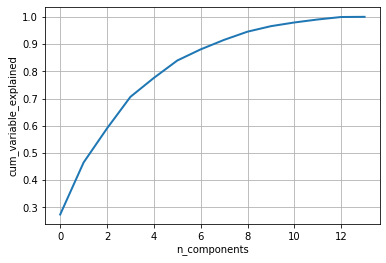

In [79]:
plt.figure(figsize = (6, 4))
plt.clf()
plt.plot(cum_var_explained, linewidth = 2)
plt.axis('tight')
plt.grid()
plt.xlabel("n_components")
plt.ylabel("cum_variable_explained")
plt.show()